In [36]:
import pandas as pd
import numpy as np

The following code displays the data types for each column in the data set.

In [37]:
adult = pd.read_csv("adult_with_pii.csv")
adult.dtypes

Name              object
DOB               object
SSN               object
Zip                int64
Age                int64
Workclass         object
fnlwgt             int64
Education         object
Education-Num      int64
Martial Status    object
Occupation        object
Relationship      object
Race              object
Sex               object
Capital Gain       int64
Capital Loss       int64
Hours per week     int64
Country           object
Target            object
dtype: object

The following codes display baisic descrpetive statistics for certain columns.

In [38]:
adult['Age'].mean()

38.58164675532078

In [39]:
max(adult['Age'])

90

In [40]:
min(adult['Age'])

17

<AxesSubplot:>

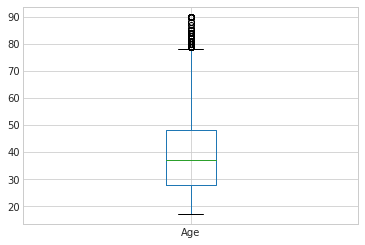

In [41]:
adult.boxplot(column = ['Age'])

In [42]:
adult['Capital Gain'].mean()


1077.6488437087312

In [43]:
max(adult['Capital Gain'])

99999

In [44]:
min(adult['Capital Gain'])

0

In [45]:
adult['Capital Loss'].mean()

87.303829734959

In [46]:
max(adult['Capital Loss'])

4356

In [47]:
min(adult['Capital Loss'])

0

In [48]:
adult['Hours per week'].mean()

40.437455852092995

In [49]:
max(adult['Hours per week'])

99

In [50]:
min(adult['Hours per week'])

1

In [51]:
adult['Workclass'].value_counts()

Private             22696
Self-emp-not-inc     2541
Local-gov            2093
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: Workclass, dtype: int64

In [52]:
adult['Education'].value_counts()

HS-grad         10501
Some-college     7291
Bachelors        5355
Masters          1723
Assoc-voc        1382
11th             1175
Assoc-acdm       1067
10th              933
7th-8th           646
Prof-school       576
9th               514
12th              433
Doctorate         413
5th-6th           333
1st-4th           168
Preschool          51
Name: Education, dtype: int64

In [53]:
adult['Martial Status'].value_counts()

Married-civ-spouse       14976
Never-married            10683
Divorced                  4443
Separated                 1025
Widowed                    993
Married-spouse-absent      418
Married-AF-spouse           23
Name: Martial Status, dtype: int64

In [54]:
adult['Occupation'].value_counts()

Prof-specialty       4140
Craft-repair         4099
Exec-managerial      4066
Adm-clerical         3770
Sales                3650
Other-service        3295
Machine-op-inspct    2002
Transport-moving     1597
Handlers-cleaners    1370
Farming-fishing       994
Tech-support          928
Protective-serv       649
Priv-house-serv       149
Armed-Forces            9
Name: Occupation, dtype: int64

In [55]:
adult['Race'].value_counts()

White                 27816
Black                  3124
Asian-Pac-Islander     1039
Amer-Indian-Eskimo      311
Other                   271
Name: Race, dtype: int64

In [56]:
adult['Sex'].value_counts()

Male      21790
Female    10771
Name: Sex, dtype: int64

In [57]:
adult['Country'].value_counts()

United-States                 29170
Mexico                          643
Philippines                     198
Germany                         137
Canada                          121
Puerto-Rico                     114
El-Salvador                     106
India                           100
Cuba                             95
England                          90
Jamaica                          81
South                            80
China                            75
Italy                            73
Dominican-Republic               70
Vietnam                          67
Guatemala                        64
Japan                            62
Poland                           60
Columbia                         59
Taiwan                           51
Haiti                            44
Iran                             43
Portugal                         37
Nicaragua                        34
Peru                             31
France                           29
Greece                      

In [58]:
adult['Target'].value_counts()

<=50K    24720
>50K      7841
Name: Target, dtype: int64

In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
adult = pd.read_csv("adult_with_pii.csv")

In [60]:
def isKAnonymized(df, k):
    for index, row in df.iterrows():
        query = ' & '.join([f'{col} == {row[col]}' for col in df.columns])
        rows = df.query(query)
        if (rows.shape[0] < k):
            return False
        
    return True

This function is used to generalize data such that k-anonymity for a desired k can be achieved. 

In [61]:
def generalize(df, depths):
    return df.apply(lambda x: x.apply(lambda y: int(int(y/(10**depths[x.name]))*(10**depths[x.name]))))

Now we must create a dataframe with 2 quasi-identifiers. In this case, it will be age and educational achievement. This is similar to what professor Rajtmajer presented in class.

In [62]:
df = adult[['Age', 'Education-Num']]
df.columns = ['age', 'edu']

In [63]:
isKAnonymized(df.head(500), 3)

False

In [64]:
# Using generalization function for age and edu
depths = {
    'age': 1,
    'edu': 1
}
df2 = generalize(df.head(500), depths)
isKAnonymized(df2, 2)

False

We see that k-anonymity for k = 3 has still not been achieved. If we look at the boxplot for age, we see that there are outliers in the data set. Outliers are very problematic when trying to achieve k-anonymity and generalizing that data even further would sacrifice data utility. Therfore we must remove outliers by clipping the age of each individual in the data to lie in a specific range. This is mentioned by Professor Rajtmajer in class. Outlier ages will be replaced by fake ages.  

In [65]:
#clipping away outlier such that age is 60 or below
depths = {
    'age': 1,
    'edu': 1
}
dfp = df.clip(upper=np.array([60, 10000000000000]), axis='columns')
df3 = generalize(dfp.head(500), depths)
isKAnonymized(df3, 3)

True

With the removal of outliers, k-anonymity of k = 3 has been achieved

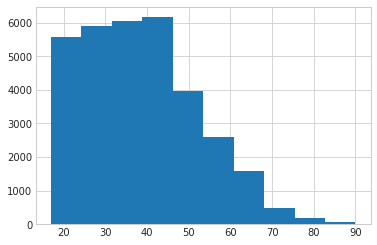

In [66]:
df['age'].hist(); # distribution of originial data frame

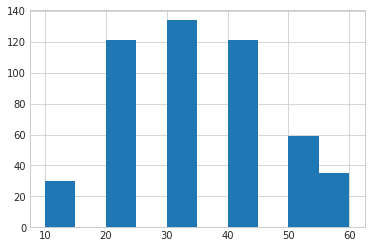

In [67]:
df3['age'].hist(); # distribution of data frame after generalization and removal of outliers

In [68]:
df[['edu', 'age']].groupby('edu').mean() # displays mean age for each education number for the original data frame

,age
edu,
1,42.764706
2,46.142857
3,42.885886
4,48.445820
5,41.060311
6,37.429796
7,32.355745
8,32.000000
9,38.974479


In [69]:
df3[['edu', 'age']].groupby('edu').mean() # displays mean age for education number based on k-anonymized data frame 

,age
edu,
0,33.772727
10,32.857143


As we can see, the original data frame includes more educational numbers. This is because the anonymized data frame had education number and age rounded to the nearest 10. The mean ages for education number are also different. Though the data frame has achieved k-anonymity with k = 3, utility has been sacrificed since that data has become more generalized. Utility has also been sacrifced due to removal of outliers. 